In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv("data/caseStudyCleaned.csv")

### 1. Is Wall’s belief about the dependence of churn rates on customer age supported by the data? To get some intuition, try visualizing this dependence (Hint: no need to run any statistical tests).

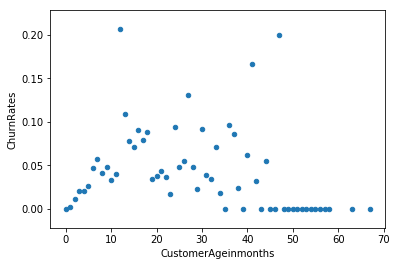

In [22]:
df1 = df.loc[:,['CustomerAgeinmonths', 'Churn1Yes0No']]
df1 = df1.groupby(['CustomerAgeinmonths']).mean()
df1.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df1 = df1.reset_index()
df1.plot.scatter(x="CustomerAgeinmonths", y="ChurnRates");

### 2. To start, run a single regression model that best predicts the probability that a customer leaves.

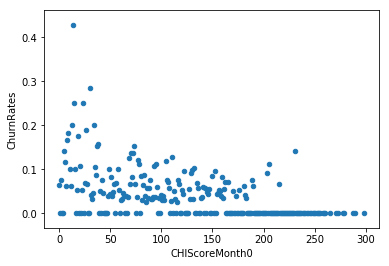

In [23]:
df_t = df.loc[:,['CHIScoreMonth0', 'Churn1Yes0No']]
df_t = df_t.groupby(['CHIScoreMonth0']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df_t.reset_index()
df_t.plot.scatter(x="CHIScoreMonth0", y="ChurnRates");

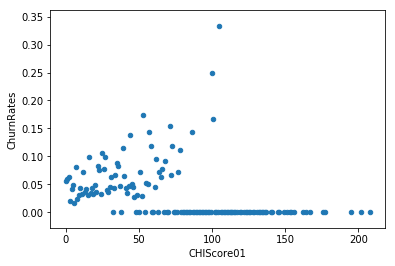

In [24]:
df_t = df.loc[:,['CHIScore01', 'Churn1Yes0No']]
df_t = df_t.groupby(['CHIScore01']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df3.reset_index()
df_t.plot.scatter(x="CHIScore01", y="ChurnRates");

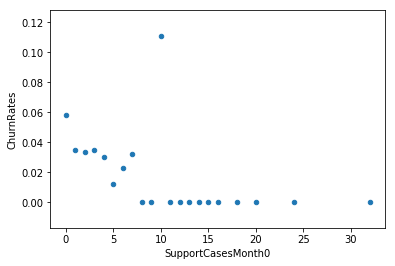

In [25]:
df_t = df.loc[:,['SupportCasesMonth0', 'Churn1Yes0No']]
df_t = df_t.groupby(['SupportCasesMonth0']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df_t.reset_index()
df_t.plot.scatter(x="SupportCasesMonth0", y="ChurnRates");

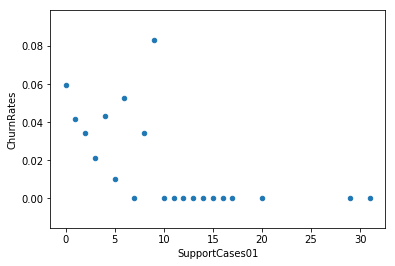

In [27]:
df_t = df.loc[:,['SupportCases01', 'Churn1Yes0No']]
df_t = df_t.groupby(['SupportCases01']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df_t.reset_index()
df_t.plot.scatter(x="SupportCases01", y="ChurnRates");

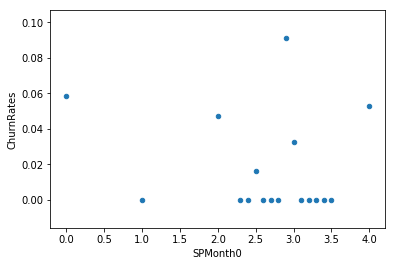

In [28]:
df_t = df.loc[:,['SPMonth0', 'Churn1Yes0No']]
df_t = df_t.groupby(['SPMonth0']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df_t.reset_index()
df_t.plot.scatter(x="SPMonth0", y="ChurnRates");

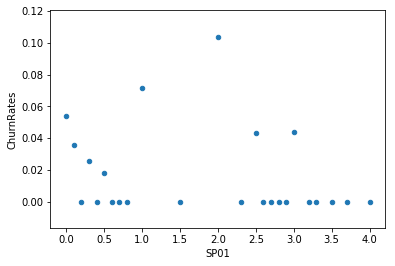

In [29]:
df_t = df.loc[:,['SP01', 'Churn1Yes0No']]
df_t = df_t.groupby(['SP01']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df_t.reset_index()
df_t.plot.scatter(x="SP01", y="ChurnRates");

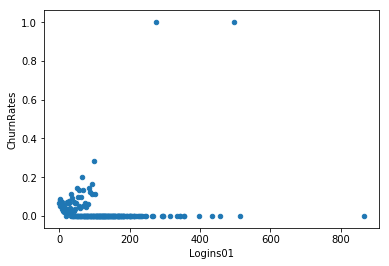

In [30]:
df_t = df.loc[:,['Logins01', 'Churn1Yes0No']]
df_t = df_t.groupby(['Logins01']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df_t.reset_index()
df_t.plot.scatter(x="Logins01", y="ChurnRates");

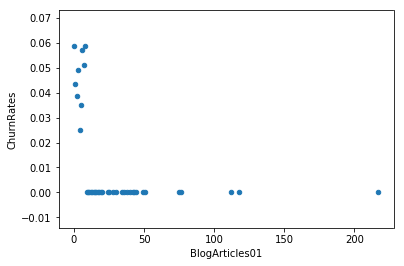

In [31]:
df_t = df.loc[:,['BlogArticles01', 'Churn1Yes0No']]
df_t = df_t.groupby(['BlogArticles01']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df_t.reset_index()
df_t.plot.scatter(x="BlogArticles01", y="ChurnRates");

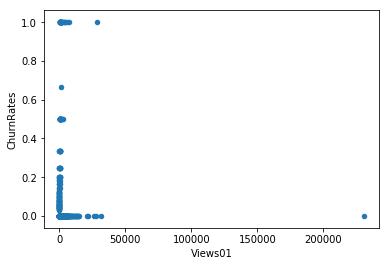

In [32]:
df_t = df.loc[:,['Views01', 'Churn1Yes0No']]
df_t = df_t.groupby(['Views01']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df_t.reset_index()
df_t.plot.scatter(x="Views01", y="ChurnRates");

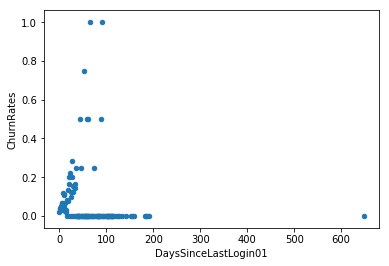

In [26]:
df_t = df.loc[:,['DaysSinceLastLogin01', 'Churn1Yes0No']]
df_t = df_t.groupby(['DaysSinceLastLogin01']).mean()
df_t.rename(columns={'Churn1Yes0No': 'ChurnRates'}, inplace=True)
df_t = df_t.reset_index()
df_t.plot.scatter(x="DaysSinceLastLogin01", y="ChurnRates");

#### a. What is the predicted probability that Customer 672 will leave between December 2011 and February 2012? Is that high or low? Did that customer actually leave?

In [41]:
prediction = LogisticRegression(solver = 'lbfgs').fit(np.array([df.CHIScoreMonth0]).T, np.array([df.Churn1Yes0No]).T)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
list = prediction.predict_proba(np.array([df.CHIScoreMonth0]).T)[:, 1]
print(list[671])
print(df.iloc[671].Churn1Yes0No)

0.033202967751108405
0.0


#### b. What about Customers 354 and 5,203?

In [5]:
print(list[353])
print(df.iloc[353].Churn1Yes0No)
print(list[5202])
print(df.iloc[5302].Churn1Yes0No)

0.03502742009007802
0.0
0.06366613937623102
0.0


### 3. How sensible is the approach with a single model? Can you suggest a better approach?

In [14]:
prediction.score(np.array([df.CHIScoreMonth0]).T, np.array([df.Churn1Yes0No]).T)

0.9491098156609422

In [3]:
prediction = LogisticRegression(solver = 'lbfgs')\
    .fit(np.array([df.CHIScoreMonth0, df.CHIScore01, df.DaysSinceLastLogin01, df.CustomerAgeinmonths]).T, np.array([df.Churn1Yes0No]).T)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
print(prediction.coef_)
print(prediction.intercept_)

[[-0.0067904   0.00265243  0.01088993  0.01703075]]
[-2.8176016]


#### a. Provide updated estimates of probabilities that Customers 672, 354, and 5,203 will leave.

In [6]:
list = prediction.predict_proba(np.array([df.CHIScoreMonth0, df.CHIScore01, df.DaysSinceLastLogin01, df.CustomerAgeinmonths]).T)[:, 1]
print(list[671])
print(df.iloc[671].Churn1Yes0No)
print(list[353])
print(df.iloc[353].Churn1Yes0No)
print(list[5202])
print(df.iloc[5302].Churn1Yes0No)

0.028590954286125483
0.0
0.030701599486555785
0.0
0.05409521306871769
0.0


#### b. What factors contribute the most to the predicted probabilities that these customers will leave?

### 4. Answer Wall’s “ultimate question”: provide the list of 100 customers with highest churn probabilities and the top three drivers of churn for each customer.

In [52]:
df['prob'] = pd.Series(list, index=df.index)
df.sort_values(by=['prob'], ascending=False).head(100)

,ID,CustomerAgeinmonths,Churn1Yes0No,CHIScoreMonth0,CHIScore01,SupportCasesMonth0,SupportCases01,SPMonth0,SP01,Logins01,BlogArticles01,Views01,DaysSinceLastLogin01,prob
2699,2700,5.0,0.0,158.0,75.0,0.0,1.0,0.0,3.0,44.0,1.0,5.0,648.0,0.996922
2562,2563,18.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,190.0,0.489876
1495,1496,36.0,0.0,10.0,35.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,185.0,0.488776
1862,1863,30.0,0.0,26.0,35.0,0.0,0.0,0.0,0.0,4.0,0.0,9.0,182.0,0.456064
132,133,44.0,0.0,50.0,25.0,0.0,0.0,0.0,0.0,4.0,0.0,100.0,187.0,0.436431
870,871,15.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,152.0,0.378352
1521,1522,18.0,0.0,31.0,16.0,0.0,0.0,0.0,0.0,3.0,0.0,13.0,158.0,0.359411
1889,1890,31.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,154.0,0.357771
1180,1181,23.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,115.0,0.282305
3256,3257,11.0,0.0,26.0,10.0,0.0,0.0,0.0,0.0,18.0,0.0,2.0,127.0,0.268753
